# Data Wrangling for CA Poverty and Employment (state and county)

In [1]:
#Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
county_poverty = pd.read_csv("./download/county_poverty.csv",skipinitialspace = True)
county_poverty.columns = county_poverty.columns.str.replace(" ","")

**Analytical Context**

The relevant data is a CSV file regarding poverty numbers in California using the California Poverty Measure (CPM).It is called "county_poverty.csv" and it contains data on poverty according to each California county. It has 23 columns. All margins of error are expressed as percentages.

* **County** : County name
* **County_group** : The county group this county belongs to.
* **CPM_rate**: Percentage of residents living in poverty, according to CPM data.
* **CPM_rate_margin_error**: CPM rate margin of error. 
* **CPM_number** : Total number of people living in poverty.
* **CPM_number_margin_error** : Margin of error for total number of people living in poverty.
* **official_rate** : Official poverty rate calculated using the official poverty universe and definition of poverty units.
* **official_rate_margin_error** : Official poverty rate margin of error
* **CPM_child_rate**: Percentage of children age 0–17 living in poverty, according to CPM data.
* **CPM_child_rate_margin_error** :  Former column margin of error
* **CPM_threshold** : Resources required for a family to live out of poverty, for a family of two adults and two children that rents their place of residence.
* **increase_no_safety** : Percentage point increase in CPM poverty rate without safety net.
* **increase_no_safety_margin_error** : Margin of error for CPM poverty percentage point increase without safety net.
* **increase_no_CalFresh** : Percentage point increase in CPM poverty rate without CalFresh.
* **increase_no_CalFresh_margin_error** : Former column margin of error
* **increase_no_CalWorks_GA** : Percentage point increase in CPM poverty rate without CalWorks and GA (General Assistance)
* **increase_no_CalWorks_GA_margin_error** : Former column margin of error
* **increase_no_EITC** : Percentage point increase in CPM poverty rate without EITC (federal Earned Income Tax Credit)
* **increase_no_EITC_margin_error** : Former column margin of error
* **increase_no_CTC** : Percentage point increase in CPM poverty rate without CTC (federal Child Tax Credit)
* **increase_no_CTC_margin_error** : Former column margin of error
* **increase_no_CALEITC_YCTC** : Percentage point increase in CPM poverty rate without CALEITC (state Earned Income Tax Credit)and YCTC (Young Child Tax Credit)
* **increase_no_CALEITC_YCTC_margin_error** : Former column margin of error


In [3]:
#Drop extra rows
county_poverty= county_poverty.drop([58,59])

In [4]:
#Remove"%" string from CPM_rate column
#Convert CPM_rate column to a float

no_percent= county_poverty["CPM_rate"].str.strip("%")
county_poverty["CPM_rate"]= pd.to_numeric(no_percent)


In [5]:
county_poverty

,County,County_group,CPM_rate,CPM_rate_margin_error,CPM_number,CPM_number_margin_error,official_rate,official_rate_margin_error,CPM_child_rate,CPM_child_rate_margin_error,...,increase_no_CalFresh,increase_no_CalFresh_margin_error,increase_no_CalWorks_GA,increase_no_CalWorks_GA_margin_error,increase_no_EITC,increase_no_EITC_margin_error,increase_no_CTC,increase_no_CTC_margin_error,increase_no_CALEITC_YCTC,increase_no_CALEITC_YCTC_margin_error
0,Alameda,Alameda,14.1,0.7,"229,400","11,200",8.2%,0.6,14.5%,1.5,...,0.8,0.2,0.6,0.2,0.8,0.3,0.3,0.2,0.1,0.1
1,Alpine,Alpine/Amador/Calaveras/Inyo/Mariposa/Mono/Tuo...,13.2,2.7,"23,700","4,800",10.9%,2.2,13.6%,5.9,...,1.0,0.7,0.4,0.4,0.9,0.7,0.4,0.5,0.1,0.3
2,Amador,Alpine/Amador/Calaveras/Inyo/Mariposa/Mono/Tuo...,13.2,2.7,"23,700","4,800",10.9%,2.2,13.6%,5.9,...,1.0,0.7,0.4,0.4,0.9,0.7,0.4,0.5,0.1,0.3
3,Butte,Butte,17.9,2.0,"39,000","4,200",16.7%,2.0,11.6%,3.3,...,2.7,1.4,0.6,0.6,2.0,1.2,0.7,0.6,0.1,0.1
4,Calaveras,Alpine/Amador/Calaveras/Inyo/Mariposa/Mono/Tuo...,13.2,2.7,"23,700","4,800",10.9%,2.2,13.6%,5.9,...,1.0,0.7,0.4,0.4,0.9,0.7,0.4,0.5,0.1,0.3
5,Colusa,Colusa/Glenn/Tehama/Trinity,14.3,3.5,"17,800","4,400",16.4%,3.6,14.7%,7.3,...,1.8,1.5,0.6,0.8,1.3,1.1,0.9,1.1,0.0,0.1
6,Contra Costa,Contra Costa,13.8,1.2,"156,900","13,300",8.2%,0.8,15.5%,2.2,...,1.0,0.4,0.5,0.3,1.0,0.4,0.8,0.4,0.0,0.1
7,Del Norte,Del Norte/Lassen/Modoc/Plumas/Siskiyou,12.8,2.4,"14,900","2,800",15.0%,2.5,11.2%,5.4,...,2.4,1.5,1.0,0.9,1.3,0.9,0.5,0.5,0.2,0.5
8,El Dorado,El Dorado,10.4,2.0,"19,700","3,800",8.3%,1.8,6.2%,3.1,...,1.3,1.2,0.4,0.6,0.7,0.7,0.4,0.5,0.0,0.1
9,Fresno,Fresno,17.2,1.4,"167,600","13,500",20.5%,1.4,17.8%,2.3,...,2.8,0.6,1.7,0.5,3.0,0.8,1.4,0.5,0.2,0.2


In [6]:
#Clean, clean, clean
county_poverty["CPM_rate_margin_ error"]=pd.to_numeric(county_poverty["CPM_rate_margin_error"])


In [7]:
clean_cpm_number= county_poverty["CPM_number"].str.replace(",","")
county_poverty["CPM_number"]=clean_cpm_number.astype(int)

In [8]:
county_poverty["CPM_number_margin_error"]= county_poverty["CPM_number_margin_error"].str.replace(",","")
county_poverty["CPM_number_margin_error"]= county_poverty["CPM_number_margin_error"].astype(int)

In [9]:
no_percent_official= county_poverty["official_rate"].str.strip("%")
county_poverty["official_rate"]= pd.to_numeric(no_percent_official)

In [10]:
county_poverty["official_rate_margin_error"] = pd.to_numeric(county_poverty["official_rate_margin_error"])

In [11]:
county_poverty

,County,County_group,CPM_rate,CPM_rate_margin_error,CPM_number,CPM_number_margin_error,official_rate,official_rate_margin_error,CPM_child_rate,CPM_child_rate_margin_error,...,increase_no_CalFresh_margin_error,increase_no_CalWorks_GA,increase_no_CalWorks_GA_margin_error,increase_no_EITC,increase_no_EITC_margin_error,increase_no_CTC,increase_no_CTC_margin_error,increase_no_CALEITC_YCTC,increase_no_CALEITC_YCTC_margin_error,CPM_rate_margin_ error
0,Alameda,Alameda,14.1,0.7,229400,11200,8.2,0.6,14.5%,1.5,...,0.2,0.6,0.2,0.8,0.3,0.3,0.2,0.1,0.1,0.7
1,Alpine,Alpine/Amador/Calaveras/Inyo/Mariposa/Mono/Tuo...,13.2,2.7,23700,4800,10.9,2.2,13.6%,5.9,...,0.7,0.4,0.4,0.9,0.7,0.4,0.5,0.1,0.3,2.7
2,Amador,Alpine/Amador/Calaveras/Inyo/Mariposa/Mono/Tuo...,13.2,2.7,23700,4800,10.9,2.2,13.6%,5.9,...,0.7,0.4,0.4,0.9,0.7,0.4,0.5,0.1,0.3,2.7
3,Butte,Butte,17.9,2.0,39000,4200,16.7,2.0,11.6%,3.3,...,1.4,0.6,0.6,2.0,1.2,0.7,0.6,0.1,0.1,2.0
4,Calaveras,Alpine/Amador/Calaveras/Inyo/Mariposa/Mono/Tuo...,13.2,2.7,23700,4800,10.9,2.2,13.6%,5.9,...,0.7,0.4,0.4,0.9,0.7,0.4,0.5,0.1,0.3,2.7
5,Colusa,Colusa/Glenn/Tehama/Trinity,14.3,3.5,17800,4400,16.4,3.6,14.7%,7.3,...,1.5,0.6,0.8,1.3,1.1,0.9,1.1,0.0,0.1,3.5
6,Contra Costa,Contra Costa,13.8,1.2,156900,13300,8.2,0.8,15.5%,2.2,...,0.4,0.5,0.3,1.0,0.4,0.8,0.4,0.0,0.1,1.2
7,Del Norte,Del Norte/Lassen/Modoc/Plumas/Siskiyou,12.8,2.4,14900,2800,15.0,2.5,11.2%,5.4,...,1.5,1.0,0.9,1.3,0.9,0.5,0.5,0.2,0.5,2.4
8,El Dorado,El Dorado,10.4,2.0,19700,3800,8.3,1.8,6.2%,3.1,...,1.2,0.4,0.6,0.7,0.7,0.4,0.5,0.0,0.1,2.0
9,Fresno,Fresno,17.2,1.4,167600,13500,20.5,1.4,17.8%,2.3,...,0.6,1.7,0.5,3.0,0.8,1.4,0.5,0.2,0.2,1.4


In [12]:
#Dropping extra columns
county_poverty = county_poverty.drop(county_poverty.iloc[:,8:24], axis = 1)


I calculated the counties with the max and min poverty rate as well as the median and mean (which do not coincide exactly with any county since it is the calculation of all the poverty rates). This is part of me exploring and tryin to see if anything pops up.


In [13]:
#Find the county with the highest poverty rate
county_max = county_poverty[county_poverty["CPM_rate"] == county_poverty["CPM_rate"].max()][["County", "CPM_rate"]]

#Find the county with the lowest poverty rate
county_min = county_poverty[county_poverty["CPM_rate"]== county_poverty["CPM_rate"].min()][["County", "CPM_rate"]]

#Find the poverty rate median
county_median = county_poverty["CPM_rate"].median()

#Find the poverty rate mean
county_mean = county_poverty["CPM_rate"].mean()

In [14]:
county_poverty["CPM_rate"].describe()

count    58.000000
mean     15.232759
std       2.472827
min      10.400000
25%      13.200000
50%      14.600000
75%      17.000000
max      20.900000
Name: CPM_rate, dtype: float64

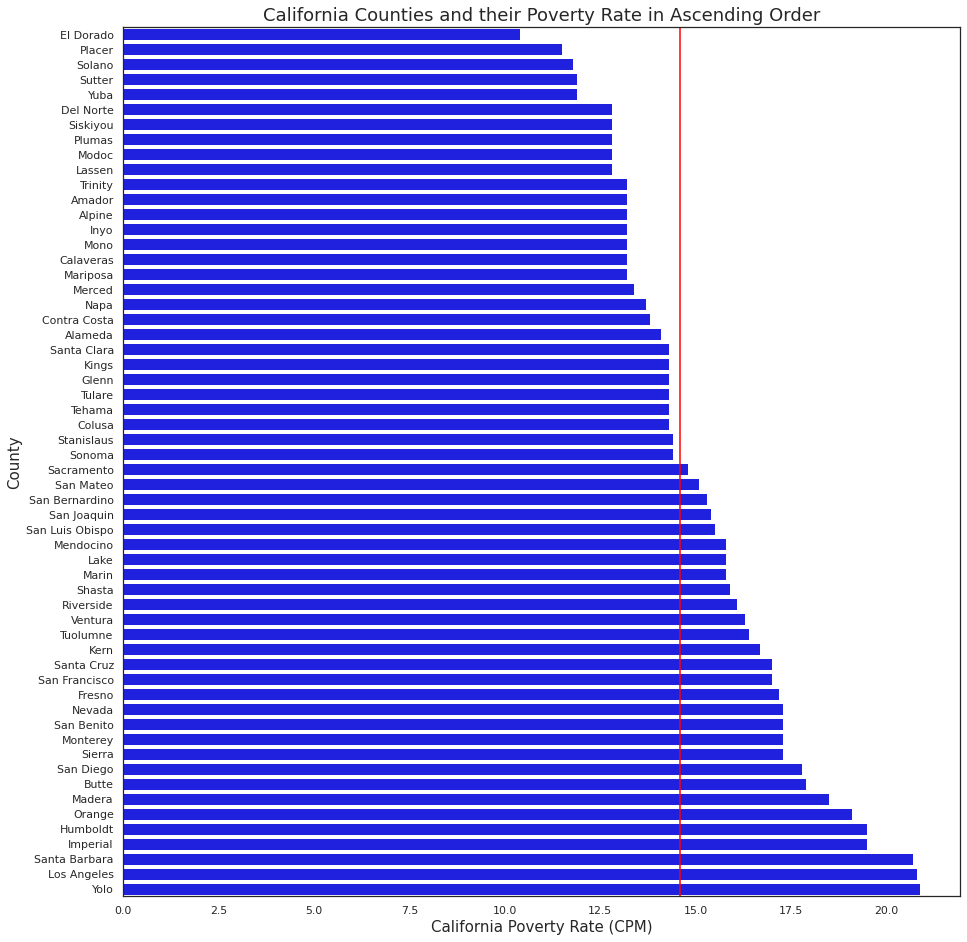

In [15]:
#Plotting a horizontal barplot
sns.set(rc = {'figure.figsize':(15,16)})
sns.set_theme(style="white")
poverty_by_counties = sns.barplot(x= county_poverty["CPM_rate"], 
                                  y= county_poverty["County"],
                                  order= county_poverty.sort_values("CPM_rate").County,
                                  orient= "h",
                                  color= "blue")
#Plotting the median
plt.axvline(x= county_median,
            color='red')
#set labels
plt.xlabel("California Poverty Rate (CPM)", size=15)
plt.ylabel("County", size=15)
plt.title("California Counties and their Poverty Rate in Ascending Order", size=18);

In [16]:
# saving the file
county_poverty.to_csv('./Data Merging/county_poverty.csv')

# Local area poverty

In [17]:
#Import local area poverty numbers
#This table contains the same columns as county_poverty but has local areas instead of counties as a geographical base.
#Not sure if we'll end up using these.
local_area_poverty= pd.read_csv("./download/local_area_poverty.csv")

# california_employment.csv

The "California-Employment.csv" file contains data on employment and unemployment in the state of California since the year 1990 as well as a breakdown of the amount of people working per industry type. Most of the data contained here will be dropped as to only have Employment, Unemployment, and Total Labor force numbers.

In [18]:
#Import California Employment info and remove extra blank spaces in all the dataframe
ca_unemployment= pd.read_csv("./download/california_employment.csv", skipinitialspace = True)
ca_unemployment.columns = ca_unemployment.columns.str.replace(" ","")

In [19]:
#Drop extra rows
ca_unemployment= ca_unemployment.drop([288,289,290,291,292,293,294,295])


In [20]:
#Drop extra columns
ca_unemployment_dropped= ca_unemployment.drop(
                    columns= 
                     ["SORTORDER",
                     "BMYEAR",
                     "AREA",
                     "INCLUDES",
                     "BREAKS",
                     "PNCO",
                     "SS-NAICS",
                     "1990",
                     "1991",
                     "1992",
                     "1993",
                     "1994",
                     "1995",
                     "1996",
                     "1997",
                     "1998",
                     "1999",
                     "2000",
                     "2001",
                     "2002",
                     "2003",
                     "2004",
                     "2005",
                     "2006",
                     "2007",
                     "2008",
                     "2009",
                     "2010",
                     "2011",
                     "2012",
                     "2013",
                     "2014",
                     "2021"])

In [21]:
#Drop extra rows. Keep only Civilian Employment, Civilian Labor Force and Civilian Unemployment
civilian_un_employment= ca_unemployment_dropped.drop(ca_unemployment_dropped.index[3:288])

The rows that remain are defined as such by the Employment Development Department of California (where this data comes from):

**Civilian Labor Force** is the sum of civilian employment and civilian unemployment. Civilians, as defined, are age 16 years or older, not members of the Armed Services, and are not in institutions such as prisons, mental hospitals, or nursing homes.

**Civilian Employment** includes all individuals who worked at least one hour for a wage or salary, or were self-employed, or were working at least 15 unpaid hours in a family business or on a family farm, during the week including the 12th of the month. Those who were on vacation, on other kinds of leave, or involved in a labor dispute, were also counted as employed.

**Civilian Unemployment** includes those individuals who were not working but were able, available, and actively looking for work during the week including the 12th of the month. Individuals who were waiting to be recalled from a layoff, and individuals waiting to report to a new job within 30 days were also considered to be unemployed.


In [22]:
#Set TITLE column as the index

civilian_un_employment= civilian_un_employment.set_index(["TITLE"])

In [23]:
# Use transpose method to swap rows and columns.
transposed_civilian_un_employment = civilian_un_employment.transpose()

In [24]:
transposed_civilian_un_employment.reset_index(inplace=True)
#transposed_civilian_un_employment["index"]=transposed_civilian_un_employment.rename(columns={"index":"Year"})

In [25]:
#Remove commas from Civilian Employment and Civilian Unemployment columns
clean_civilian_unemployment= transposed_civilian_un_employment[ "Civilian Unemployment"].str.replace(',','')
clean_civilian_employment= transposed_civilian_un_employment["Civilian Employment"].str.replace(",",'')
clean_labor_force= transposed_civilian_un_employment["Civilian Labor Force"].str.replace(",", "")

In [26]:
#Make values in columns into integers
transposed_civilian_un_employment[ "Civilian Unemployment"]=clean_civilian_unemployment.astype(int)
transposed_civilian_un_employment["Civilian Employment"]=clean_civilian_employment.astype(int)
transposed_civilian_un_employment["Civilian Labor Force"]=clean_labor_force.astype(int)

In [27]:
melted_employment= pd.melt(transposed_civilian_un_employment, id_vars=["index"], value_vars=["Civilian Labor Force",
                                                                          "Civilian Employment",
                                                                          "Civilian Unemployment"])

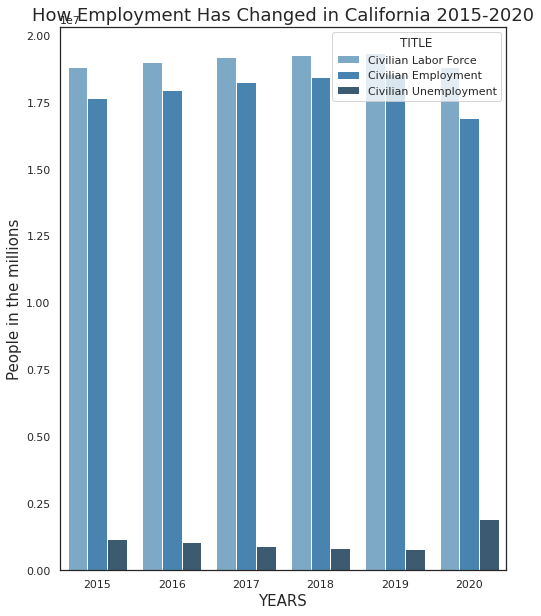

In [28]:
sns.set(rc = {'figure.figsize':(8,10)})
sns.set_theme(style="white")
sns.barplot(data=melted_employment,x="index",y="value",hue="TITLE",
                 palette="Blues_d")

plt.xlabel("YEARS", size=15)
plt.ylabel("People in the millions", size=15)
plt.title("How Employment Has Changed in California 2015-2020", size=18);

**Some observations**: Unemployment numbers seem to have been going down in the state from 2015 to 2019 but rose in 2020. Similarly, the total number of people in the labor force diminished in 2020, although it had been growing previously. Where did these people go? Hypothesis: More people retired and/or became stay at home parents.


In [29]:
ca_unemployment = melted_employment

In [30]:
ca_unemployment= ca_unemployment.rename(columns={'index': 'Year', 'Employment Type': "Employment",'value': 'Value'})

In [31]:
ca_unemployment

,Year,TITLE,Value
0,2015,Civilian Labor Force,18824100
1,2016,Civilian Labor Force,19012000
2,2017,Civilian Labor Force,19173800
3,2018,Civilian Labor Force,19263900
4,2019,Civilian Labor Force,19353700
5,2020,Civilian Labor Force,18821200
6,2015,Civilian Employment,17647400
7,2016,Civilian Employment,17965400
8,2017,Civilian Employment,18246800
9,2018,Civilian Employment,18442400


In [32]:
ca_unemployment.to_csv('./Data Merging/ca_unemployment.csv')

# Employment by CA County

The "Employment County" directory contains employment data on California counties. Each file represents a different geographical area that can correspond to one of these three:

* Cnty = County
* MD = Metropolitan Division
* MSA = Metropolitan Statistical Area

Each file contains monthly numbers, some up until November of 2021.

In [33]:
# import OS module
import os

county_dict = {
    'TUOLUHWS.csv':"Tuolumne",
    'PLUMAHWS.csv':"Plumas",
    'DELNOHWS.csv':"Del Norte",
    'VALL$HWS.csv':"Vallejo Fairfield MSA (Solano County)",
    'YUBAHWS.csv': "Yuba",
    'ALAMEHWS.csv':"Alameda",
    'MARIPHWS.csv': "Mariposa",
    'SACHWS.csv': "Sacramento",
    'SANF$HWS.csv':"San Francisco Redwood City South San Francisco MD (San Francisco and San Mateo Counties)",
    'MARINHWS.csv':"San Rafael MD (Marin County)",
    'SACR$HWS.csv':"Sacramento Roseville Arden Arcade MSA (El Dorado, Placer, Sacramento and Yolo Counties)",
    'SANBEHWS.csv':"San Benito",
    'SCRZ$HWS.csv':"Santa Cruz Watsonville MSA (Santa Cruz County)",
    'MODOCHWS.csv':"Modoc",
    'MENDOHWS.csv':"Mendocino",
    'SANTCHWS.csv':"Santa Clara",
    'COLUSHWS.csv':"Colusa",
    'INYOHWS.csv':"Inyo",
    'SATR$HWS.csv': "Santa Rosa MSA (Sonoma County)",
    'SATB$HWS.csv':"Santa Maria Santa Barbara MSA (Santa Barbara County)",
    'FRSN$HWS.csv':"Fresno MSA",
    'NEVADHWS.csv':"Nevada",
    'MODE$HWS.csv': "Modesto MSA (Stanislaus County)",
    'BAKE$HWS.csv':"Bakersfield MSA (Kern County)",
    'TEHAMHWS.csv':"Tehama",
    'STOC$HWS.csv':"Stockton Lodi MSA (San Joaquin County)",
    'CONTRHWS.csv':"Contra Costa",
    'SLO$HWS.csv':"San Luis Obispo Paso Robles Arroyo Grande MSA (San Luis Obispo County)",
    'RIVEHWS.csv':"Riverside",
    'ECEN$HWS.csv':"El Centro MSA (Imperial County)",
    'CALAVHWS.csv':"Calaveras",
    'AMADOHWS.csv':"Amador",
    'MERC$HWS.csv':"Merced MSA (Merced County)",
    'LA$HWS.csv':"Los Angeles Long Beach Glendale MD (Los Angeles County)",
    'SANMAHWS.csv':"San Mateo",
    'SIERRHWS.csv':"Sierra",
    'LASSEHWS.csv':"Lassen",
    'CHIC$HWS.csv':"Chico MSA (Butte County)",
    'VISA$HWS.csv':"Visalia Porterville MSA (Tulare County)",
    'YOLOHWS.csv':"Yolo",
    'SANBRHWS.csv': "San Bernardino",
    'HANF$HWS.csv':"Hanford-Corcoran MSA (Kings County)",
    'ORAN$HWS.csv':"Anaheim Santa Ana Irvine MD (Orange County)",
    'SUTTEHWS.csv':"Sutter",
    'ALPINHWS.csv':"Alpine",
    'OAK$HWS.csv':"Oakland Hayward Berkeley MD (Alameda and Contra Costa Counties)",
    'SANFRHWS.csv':"San Francisco",
    'ELDORHWS.csv':"El Dorado",
    'SALI$HWS.csv':"Salinas MSA (Monterey County)",
    'SJOS$HWS.csv':"San Jose Sunnyvale Santa Clara MSA (San Benito and Santa Clara Counties)",
    'REDD$HWS.csv':"Redding MSA (Shasta County)",
    'VENT$HWS.csv':"Oxnard Thousand Oaks Ventura MSA (Ventura County)",
    'GLENNHWS.csv':"Glenn",
    'MONOHWS.csv':"Mono",
    'PLACEHWS.csv':"Placer",
    'NAPA$HWS.csv':"Napa MSA (Napa County)",
    'SAND$HWS.csv':"San Diego Carlsbad MSA (San Diego County)",
    'HUMBOHWS.csv':"Humboldt",
    'YUBA$HWS.csv': "Yuba City MSA (Sutter and Yuba Counties)",
    'TRINIHWS.csv':"Trinity",
    'LAKEHWS.csv':"Lake",
    'RIVE$HWS.csv':"Riverside San Bernardino Ontario MSA (Riverside and San Bernardino Counties)",
    'SISKIHWS.csv':"Siskiyou",
    'MAD$HWS.csv':"Madera MSA (Madera County)"
}

In [34]:
#Function find_first_nan(column) finds the first null value in a series 

#Function load_file(file)
def find_first_nan(column):
    index = 0
    for value in column:
        if pd.isnull(value):
            return index
        
        index = index + 1
        
    return -1


def load_file(file):
    data= pd.read_csv("./download/Employment County/" + file, header=7, skipinitialspace = True)
    data = data.drop(range(find_first_nan(data["TITLE"]), len(data)))
    data = data.drop(data.iloc[:,0:7], axis = 1)
    data = data.drop(data.iloc[:,1:61], axis=1)
    data["COUNTY"]= county_dict[file]
    data = data.applymap(lambda x: x if pd.isnull(x) else x.replace(",", ""))
    data = data.applymap(lambda x: x if pd.isnull(x) else x.replace("%", ""))
    
    for number in range(1,84):
        data.iloc[:,number] = pd.to_numeric(data.iloc[:,number])
    
    return data

In [35]:
# Get the list of all files and directories
dir_list = os.listdir("./download/Employment County")

dataframe_list = []

for file in dir_list:
    try:
        data = load_file(file)
        dataframe_list.append(data)
    except:
        print('Error loading file', file)

In [36]:
county_employment= pd.concat(dataframe_list,ignore_index=True)
county_employment= county_employment.rename(columns={'TITLE': 'Employment'})
county_employment

,Employment,Jan-15,Feb-15,Mar-15,Apr-15,May-15,Jun-15,Jul-15,Aug-15,Sep-15,...,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,COUNTY
0,Civilian Labor Force,21450.0,21380.0,21420.0,21410.0,21760.0,21730.0,21770.0,21640.0,21580.0,...,19710.0,19470.0,19730.0,19830.0,20050.0,20100.0,19900.0,19690.0,19610.0,Tuolumne
1,Civilian Employment,19620.0,19620.0,19700.0,19860.0,20270.0,20200.0,20220.0,20210.0,20250.0,...,18100.0,18000.0,18380.0,18340.0,18570.0,18680.0,18680.0,18510.0,18540.0,Tuolumne
2,Civilian Unemployment,1830.0,1770.0,1720.0,1550.0,1480.0,1530.0,1550.0,1430.0,1330.0,...,1610.0,1470.0,1350.0,1490.0,1480.0,1420.0,1220.0,1190.0,1070.0,Tuolumne
3,Civilian Unemployment Rate,8.5,8.3,8.0,7.2,6.8,7.0,7.1,6.6,6.2,...,8.2,7.6,6.8,7.5,7.4,7.0,6.1,6.0,5.4,Tuolumne
4,Total All Industries,16780.0,16800.0,16910.0,17180.0,17540.0,17610.0,17530.0,17580.0,17620.0,...,16050.0,16300.0,16620.0,16670.0,16560.0,16830.0,16660.0,16530.0,16520.0,Tuolumne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2785,Local Government Education,4300.0,4400.0,4400.0,4400.0,4500.0,4400.0,3700.0,4100.0,4300.0,...,4100.0,4100.0,4300.0,4800.0,3100.0,4200.0,4400.0,4500.0,4700.0,Madera MSA (Madera County)
2786,Local Government Excluding Education,2100.0,2100.0,2100.0,2100.0,2200.0,2200.0,2200.0,2300.0,2400.0,...,3400.0,3400.0,3400.0,3400.0,3400.0,3400.0,3300.0,3200.0,3200.0,Madera MSA (Madera County)
2787,County,1400.0,1400.0,1400.0,1400.0,1500.0,1500.0,1500.0,1500.0,1600.0,...,1700.0,1600.0,1600.0,1600.0,1600.0,1600.0,1600.0,1600.0,1500.0,Madera MSA (Madera County)
2788,City,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,Madera MSA (Madera County)


In [37]:
# save the file
county_employment.to_csv('./Data Merging/county_employment.csv')